Mean Squared Error: 3921.8667098749893
R^2 Score: 0.8643349766487421
               Coefficient
Temperatur       -2.784990
Warengruppe_2   409.178653
Warengruppe_3    93.179516
Warengruppe_4   -53.477775
Warengruppe_5   178.144468


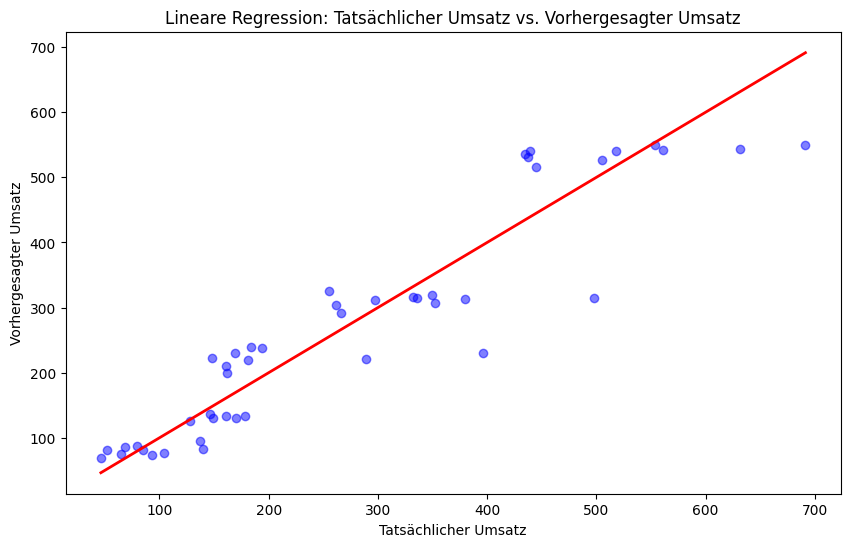

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import Datamerge
from Datamerge import merged_df

# Einlesen der merged-Datei 
df = merged_df

# Konvertieren der Spalte 'Warengruppe' in eine kategorische Variable
df['Warengruppe'] = pd.Categorical(df['Warengruppe'])

# Umwandeln der Kategorie in Dummy-Variablen
df = pd.get_dummies(df, columns=['Warengruppe'], drop_first=True)

# Features und Zielvariable definieren
X = df[['Temperatur'] + [col for col in df.columns if 'Warengruppe' in col]]
y = df['Umsatz']

# Aufteilen der Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Erstellen des linearen Regressionsmodells
model = LinearRegression()

# Trainieren des Modells
model.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
y_pred = model.predict(X_test)

# Auswerten des Modells
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Koeffizienten des Modells anzeigen
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Diagramm erstellen
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Tatsächlicher Umsatz')
plt.ylabel('Vorhergesagter Umsatz')
plt.title('Lineare Regression: Tatsächlicher Umsatz vs. Vorhergesagter Umsatz')
plt.show()
